In [62]:
import pandas as pd

In [63]:

import yfinance as yf
from datetime import date

# get daily price TS from yahoo fin 
start_time = date.fromisoformat('2019-10-01')
end_time = date.fromisoformat('2019-11-30')

# 1.2 Importing gold ETF prices (GLD) for 10/19 and 11/19 
gld_df = yf.download('GLD', start_time, end_time, auto_adjust=True)
series_gld = gld_df[['Close']]


[*********************100%***********************]  1 of 1 completed


In [64]:
# 1.3 Importing equity ETF prices 10/19 and 11/19
mchi_df = yf.download('MCHI', start_time, end_time, auto_adjust=True)
mchi_series = mchi_df[['Close']]

[*********************100%***********************]  1 of 1 completed


In [65]:
import pandas_datareader as pdr

# 1.1 Import closing daily interest rates for 6 active US Treasury yield benchmarks (2yr, 3yr, 5yr, 7yr, 10yr, 30yr) from FRED
dgs10 = pdr.get_data_fred('DGS10')
dgs30 = pdr.get_data_fred('DGS30')
dgs7 = pdr.get_data_fred('DGS7')
dgs5 = pdr.get_data_fred('DGS5')
dgs3 = pdr.get_data_fred('DGS3')
dgs2 = pdr.get_data_fred('DGS2')


In [66]:
benchmark_secs = dgs10.merge(dgs30,on='DATE').merge(dgs7,on='DATE').merge(dgs5,on='DATE').merge(dgs3,on='DATE').merge(dgs2,on='DATE').dropna()
benchmark_secs.head

<bound method NDFrame.head of             DGS10  DGS30  DGS7  DGS5  DGS3  DGS2
DATE                                            
2016-01-14   2.10   2.90  1.87  1.52  1.14  0.90
2016-01-15   2.03   2.81  1.79  1.46  1.08  0.85
2016-01-19   2.06   2.82  1.82  1.49  1.11  0.88
2016-01-20   2.01   2.77  1.76  1.44  1.06  0.85
2016-01-21   2.02   2.79  1.77  1.44  1.06  0.84
...           ...    ...   ...   ...   ...   ...
2021-01-05   0.96   1.70  0.66  0.38  0.17  0.13
2021-01-06   1.04   1.81  0.74  0.43  0.20  0.14
2021-01-07   1.08   1.85  0.78  0.46  0.22  0.14
2021-01-08   1.13   1.87  0.81  0.49  0.24  0.14
2021-01-11   1.15   1.88  0.84  0.50  0.22  0.14

[1248 rows x 6 columns]>

In [104]:
# 2.1 Compute the daily returns of your Gold ETF and your Equity ETF
series_gld['2019-10-01':'2019-11-30'].pct_change().fillna(0) # Gold ETF (GLD) daily returns

Close
Date                
2019-10-01  0.000000
2019-10-02  0.011674
2019-10-03  0.004531
2019-10-04  0.000000
2019-10-07 -0.008527
2019-10-08  0.008743
2019-10-09  0.000916
2019-10-10 -0.008729
2019-10-11 -0.005539
2019-10-14  0.003999
2019-10-15 -0.006971
2019-10-16  0.005730
2019-10-17  0.001424
2019-10-18 -0.001067
2019-10-21 -0.004770
2019-10-22  0.002933
2019-10-23  0.002354
2019-10-24  0.007116
2019-10-25  0.002332
2019-10-28 -0.008600
2019-10-29 -0.002773
2019-10-30  0.005490
2019-10-31  0.009998
2019-11-01  0.000913
2019-11-04 -0.002876
2019-11-05 -0.016180
2019-11-06  0.004290
2019-11-07 -0.015521
2019-11-08 -0.006364
2019-11-11 -0.002402
2019-11-12  0.002700
2019-11-13  0.004002
2019-11-14  0.004204
2019-11-15 -0.002526
2019-11-18  0.002966
2019-11-19  0.000505
2019-11-20  0.000505
2019-11-21 -0.005477
2019-11-22 -0.001884
2019-11-25 -0.004792
2019-11-26  0.004815
2019-11-27 -0.005300
2019-11-29  0.006204

In [68]:
series_gld.pct_change().fillna(0) # MCHI daily returns

Close
Date                
2019-10-01  0.000000
2019-10-02  0.011674
2019-10-03  0.004531
2019-10-04  0.000000
2019-10-07 -0.008527
2019-10-08  0.008743
2019-10-09  0.000916
2019-10-10 -0.008729
2019-10-11 -0.005539
2019-10-14  0.003999
2019-10-15 -0.006971
2019-10-16  0.005730
2019-10-17  0.001424
2019-10-18 -0.001067
2019-10-21 -0.004770
2019-10-22  0.002933
2019-10-23  0.002354
2019-10-24  0.007116
2019-10-25  0.002332
2019-10-28 -0.008600
2019-10-29 -0.002773
2019-10-30  0.005490
2019-10-31  0.009998
2019-11-01  0.000913
2019-11-04 -0.002876
2019-11-05 -0.016180
2019-11-06  0.004290
2019-11-07 -0.015521
2019-11-08 -0.006364
2019-11-11 -0.002402
2019-11-12  0.002700
2019-11-13  0.004002
2019-11-14  0.004204
2019-11-15 -0.002526
2019-11-18  0.002966
2019-11-19  0.000505
2019-11-20  0.000505
2019-11-21 -0.005477
2019-11-22 -0.001884
2019-11-25 -0.004792
2019-11-26  0.004815
2019-11-27 -0.005300
2019-11-29  0.006204

In [69]:
# 3.1 Avg yield for each benchmark security for October
benchmark_secs['2019-10-01':'2019-10-31'].mean(axis=0)

DGS10    1.706818
DGS30    2.190455
DGS7     1.615000
DGS5     1.525000
DGS3     1.528182
DGS2     1.551364
dtype: float64

In [70]:
# 3.1 Avg yield for each benchmark security for November
benchmark_secs['2019-11-01':'2019-11-30'].mean(axis=0)

DGS10    1.812105
DGS30    2.280526
DGS7     1.735789
DGS5     1.639474
DGS3     1.612105
DGS2     1.612632
dtype: float64

In [71]:
# 3.2 For the month of October, compute the average price the Gold ETF. 
series_gld['2019-10-01':'2019-10-31'].mean()

Close    140.874782
dtype: float64

In [72]:
# 3.2  Repeat the average calculation for November.
series_gld['2019-11-01':'2019-11-30'].mean()

Close    138.570499
dtype: float64

In [73]:
# 3.3 For the month of October, compute the average price the Equity ETF. 
mchi_series['2019-10-01':'2019-10-31'].mean()

Close    56.425028
dtype: float64

In [74]:
# 3.3  Repeat the average calculation for November.
mchi_series['2019-11-01':'2019-11-30'].mean()

Close    58.789387
dtype: float64

In [75]:
# 3.4 For the month of October, compute the standard deviation for each benchmark security. 
benchmark_secs['2019-10-01':'2019-10-31'].std(axis=0)

DGS10    0.104808
DGS30    0.101300
DGS7     0.100653
DGS5     0.104460
DGS3     0.096443
DGS2     0.080315
dtype: float64

In [76]:
# 3.4  Repeat the average calculation for November.
benchmark_secs['2019-11-01':'2019-11-30'].std(axis=0)

DGS10    0.065028
DGS30    0.076918
DGS7     0.061039
DGS5     0.052755
DGS3     0.044043
DGS2     0.033804
dtype: float64

In [77]:
# 3.5 For the month of October, compute the standard deviation of the Gold ETF. 
series_gld['2019-10-01':'2019-10-31'].std()

Close    0.831229
dtype: float64

In [78]:
# 3.5  Repeat the average calculation for November.
series_gld['2019-11-01':'2019-11-30'].std()

Close    1.562095
dtype: float64

In [79]:
# 3.6 For the month of October, compute the standard deviation of the Equity ETF.
mchi_series['2019-10-01':'2019-10-31'].std()

Close    1.119073
dtype: float64

In [80]:
# 3.6   Repeat the average calculation for November.
mchi_series['2019-11-01':'2019-11-30'].std()

Close    0.727089
dtype: float64

<AxesSubplot:xlabel='DATE'>

<Figure size 432x288 with 0 Axes>

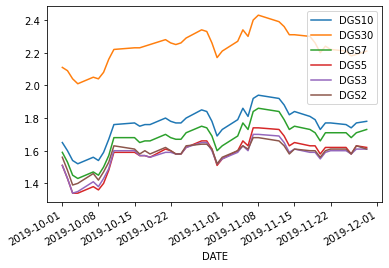

In [81]:
# 4.1 Graph the 6 benchmark securities for the 2 months on 1 plot.  That means the 6 yield series are overlaid on the same area.  Add a legend
import matplotlib.pyplot as plt
plt.figure()

benchmark_secs['2019-10-01':'2019-11-30'].plot()

<AxesSubplot:xlabel='Date'>

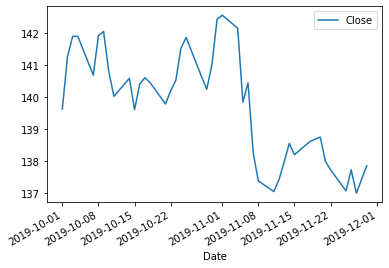

In [82]:
# 4.2 On a separate graph, plot the gold ETF prices (not returns!) for the 2 months.  Use the left-side axis for the price label
series_gld['2019-10-01':'2019-11-30'].plot()

<AxesSubplot:xlabel='Date'>

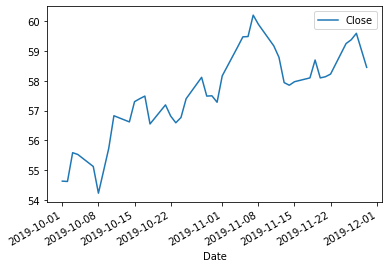

In [83]:
# 4.3 On the same graph, plot the equity ETF prices (not returns!) for the 2 months.  Be sure to use a separate scale, and the right-side axis for the price label
mchi_series['2019-10-01':'2019-11-30'].plot()

In [84]:
# 5.1 Use either Nelson-Siegel, or Nelson-Siegel-Svensson to fit the Yield Curve.  Write out the equation.

from IPython.display import display, Math, Latex
display(Math(r'r(T) = B_0 + (B_1(1-e^(-T/tau))/(T/tau) + (B_2(1-e^(-T/tau))/(T/tau)'))


<IPython.core.display.Math object>

In [85]:
import pyesg
import numpy as np
maturities = np.array([10, 30, 2, 3, 5, 7])

# 5.2 Fit the yield curve each day using the 6 benchmark yields for the October data
from nelson_siegel_svensson.calibrate import calibrate_ns_ols

for day,row in benchmark_secs['2019-10-01':'2019-10-31'].iterrows():
    yield_day = row.values
    curve, status = calibrate_ns_ols(maturities, yield_day, tau0=1.0)  # starting value of 1.0 for the optimization of tau
    print(day, curve)

2019-10-01 00:00:00 NelsonSiegelCurve(beta0=2.4233161504247747, beta1=-0.5546822914825376, beta2=-2.128660940797409, tau=3.518346472657835)
2019-10-02 00:00:00 NelsonSiegelCurve(beta0=2.4029368402008635, beta1=-0.4778107805812337, beta2=-2.506208546696285, tau=3.1571503028370067)
2019-10-03 00:00:00 NelsonSiegelCurve(beta0=2.347576052136773, beta1=-0.3990484725233383, beta2=-2.786294055578462, tau=2.9024288715151223)
2019-10-04 00:00:00 NelsonSiegelCurve(beta0=2.327787066618656, beta1=-0.5515394393282185, beta2=-2.391447103200635, tau=3.2504282491354757)
2019-10-07 00:00:00 NelsonSiegelCurve(beta0=2.3786287624544142, beta1=-0.6448820869684044, beta2=-2.183485571587193, tau=3.504012707992071)
2019-10-08 00:00:00 NelsonSiegelCurve(beta0=2.375743313127117, beta1=-0.6176130351924338, beta2=-2.337864351384609, tau=3.419806475720322)
2019-10-09 00:00:00 NelsonSiegelCurve(beta0=2.39780296076183, beta1=-0.5702929893213005, beta2=-2.350624491282757, tau=3.2780911484471735)
2019-10-10 00:00:00 N

In [86]:
# 5.3 Fit the yield curve each day using the 6 benchmark yields for the November data
for day,row in benchmark_secs['2019-11-01':'2019-11-30'].iterrows():
    yield_day = row.values
    curve, status = calibrate_ns_ols(maturities, row, tau0=1.0)  # starting value of 1.0 for the optimization of tau
    print(day, curve)

2019-11-01 00:00:00 NelsonSiegelCurve(beta0=2.534468631383615, beta1=-0.5124067088643356, beta2=-2.5159733935765387, tau=3.206746455060217)
2019-11-04 00:00:00 NelsonSiegelCurve(beta0=2.585612269522855, beta1=-0.4110760548282024, beta2=-2.7402245911256533, tau=2.990563724036849)
2019-11-05 00:00:00 NelsonSiegelCurve(beta0=2.6520007722458394, beta1=-0.22314158590921873, beta2=-3.155457361515928, tau=2.7419927596956692)
2019-11-06 00:00:00 NelsonSiegelCurve(beta0=2.62101718114195, beta1=-0.3248838812000312, beta2=-2.9621133172659975, tau=2.911795837603907)
2019-11-07 00:00:00 NelsonSiegelCurve(beta0=2.7245336217892477, beta1=-0.25626168108034864, beta2=-3.1095133570499014, tau=2.858791817815553)
2019-11-08 00:00:00 NelsonSiegelCurve(beta0=2.7549744025711416, beta1=-0.15939951415617126, beta2=-3.3839014036553885, tau=2.713952422456322)
2019-11-12 00:00:00 NelsonSiegelCurve(beta0=2.70733833606421, beta1=-0.17211651044351362, beta2=-3.238734458705958, tau=2.7495230060662874)
2019-11-13 00:0

In [87]:
### 5.4 What are the significant changes, if any?  Be specific with regards to the values of the parameters!

# Comparing the October/November modeled values, the fitted Beta1 values seem to less negative (closer to 0), while the Beta2 values appear to be more negative


In [88]:
# 7.1 Using gold ETF prices, find the daily high minus low for each month.  Compute the average for October.  Compute the average for November.
october_max = series_gld['2019-10-01':'2019-10-31'].max()
october_min = series_gld['2019-10-01':'2019-10-31'].min()
print(october_max, october_min)

october_mean = series_gld['2019-10-01':'2019-10-31'].mean()
november_mean = series_gld['2019-11-01':'2019-11-30'].mean()
print("October mean:", october_mean)
print("November mean:" ,november_mean)


Close    142.429993
dtype: float64 Close    139.610001
dtype: float64
October mean: Close    140.874782
dtype: float64
November mean: Close    138.570499
dtype: float64


In [89]:
# 7.2 Using the gold ETF returns, find the standard deviation for October.  
series_gld['2019-10-01':'2019-10-31'].pct_change().fillna(0).std()

Close    0.006035
dtype: float64

In [90]:
# Repeat for November
series_gld['2019-11-01':'2019-11-30'].pct_change().fillna(0).std()

Close    0.006172
dtype: float64

In [91]:
# 7.3 Using the October gold ETF returns, find a GARCH(1,1) model.  Repeat for November

from arch import arch_model

gld_returns = pd.DataFrame(np.diff(np.log(gld_df['Close'].values)))
gld_returns.index = gld_df.index.values[1:gld_df.index.values.shape[0]]
gld_returns.columns = ['GLD Returns']
am = arch_model(gld_returns['2019-10'])
res = am.fit(update_freq=5)
print(res.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: -81.26790642844298
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            GLD Returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                81.2679
Distribution:                  Normal   AIC:                          -154.536
Method:            Maximum Likelihood   BIC:                          -150.172
                                        No. Observations:                   22
Date:                Tue, Jan 12 2021   Df Residuals:                       18
Time:                        16:34:43   Df Model:                            4
                                  Mean Model                                 
   

In [92]:
am = arch_model(gld_returns['2019-11']) # November
res = am.fit(update_freq=5)
print(res.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: -73.88584271058463
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            GLD Returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                73.8858
Distribution:                  Normal   AIC:                          -139.772
Method:            Maximum Likelihood   BIC:                          -135.789
                                        No. Observations:                   20
Date:                Tue, Jan 12 2021   Df Residuals:                       16
Time:                        16:34:43   Df Model:                            4
                                  Mean Model                                  
  

In [93]:
# 7.4 What are the significant changes, if any?  Be specific with regards to the values of the parameters!

# omega and beta seem to be approximately the same across Oct/Nov, while mu and alpha are noticeably different

In [94]:
# 7.5 Using equity ETF prices, find the daily high minus low for each month.  
mchi_series['2019-10'].max() - mchi_series['2019-10'].min() # October

Close    3.869366
dtype: float64

In [95]:
mchi_series['2019-11'].max() - mchi_series['2019-11'].min() # November

Close    2.341206
dtype: float64

In [96]:
# Compute the average for October.  Compute the average for November.
mchi_series['2019-10'].mean() # October
mchi_series['2019-11'].mean() # November

Close    58.789387
dtype: float64

In [97]:
# 7.6 Using equity ETF returns, find the standard deviation for October.  Repeat for November
mchi_series['2019-10'].pct_change().fillna(0).std() # October

Close    0.010235
dtype: float64

In [98]:
mchi_series['2019-11'].pct_change().fillna(0).std() # November

Close    0.009688
dtype: float64

In [99]:
# 7.7 Using October equity ETF returns, find a GARCH(1,1) model.  Repeat for November (3 points)

mchi_returns = pd.DataFrame(np.diff(np.log(mchi_df['Close'].values)))
mchi_returns.index = mchi_df.index.values[1:mchi_df.index.values.shape[0]]
mchi_returns.columns = ['MCHI Returns']

am = arch_model(mchi_returns['2019-10']) # October
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     42,   Neg. LLF: -68.26177121587669
Optimization terminated successfully    (Exit mode 0)
            Current function value: -69.68420254693507
            Iterations: 10
            Function evaluations: 49
            Gradient evaluations: 6
                     Constant Mean - GARCH Model Results                      
Dep. Variable:           MCHI Returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                69.6842
Distribution:                  Normal   AIC:                          -131.368
Method:            Maximum Likelihood   BIC:                          -127.004
                                        No. Observations:                   22
Date:                Tue, Jan 12 2021   Df Residuals:                       18
Time:                        16:34:44   Df Model:                            4
       

In [100]:
am = arch_model(mchi_returns['2019-11']) # November
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 37613295.09125874
Optimization terminated successfully    (Exit mode 0)
            Current function value: -63.731645321106484
            Iterations: 11
            Function evaluations: 85
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:           MCHI Returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                63.7316
Distribution:                  Normal   AIC:                          -119.463
Method:            Maximum Likelihood   BIC:                          -115.480
                                        No. Observations:                   20
Date:                Tue, Jan 12 2021   Df Residuals:                       16
Time:                        16:34:44   Df Model:                            4
       

In [101]:
# 7.8 What are the significant changes, if any?  Be specific with regards to the values of the parameters!

# mu is significantly lower in November compared to the value for October. alpha also seems to be a magnitude smaller in November than October. beta values are similar for both months.pip

In [102]:
# 8.1 Compute the Pearson correlation between the gold and equity returns in October?  Repeat for November.
from scipy.stats import pearsonr

corr, _ = pearsonr(mchi_returns['MCHI Returns'], gld_returns['GLD Returns'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.366
